In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
print("Loading the Dataset...")
dataset = load_dataset("lukebarousse/data_jobs")
print("Dataset Loaded Successfully...")

#converting dataset to a data frame
df = dataset["train"].to_pandas()
print("Data Frame Created...")

############ Cleaning
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df.drop(["salary_hour_avg"], axis=1, inplace=True)
df = df[df["job_title_short"].notna()]
df = df[df["salary_year_avg"].notna()]
df["joining_month"] = df["job_posted_date"].dt.month
print("Data Cleaned...")

Loading the Dataset...
Dataset Loaded Successfully...
Data Frame Created...
Data Cleaned...


In [44]:
# Lets analyze how Data Scientist, Data Engineer and Data Analyst hiring were trending across different months in a year

# Getting the month names from month numbers we had earlier
df['month'] = pd.to_datetime(df["joining_month"], format='%m').dt.strftime("%B")

# Creating a pivot talbe with month names as axis and all the different jobs as columns with aggfunc as size focusing only on countries in India

df_India = df[df["job_country"] == "India"].copy()
df_India_pivot = df_India.pivot_table(index="month", columns="job_title_short", aggfunc="size")
df_India_pivot

job_title_short,Business Analyst,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month,,,,,,,,,
April,NaN,7.0,14.0,5.0,7.0,NaN,5.0,2.0,5.0
August,NaN,5.0,13.0,5.0,3.0,3.0,7.0,3.0,6.0
December,3.0,5.0,13.0,10.0,1.0,1.0,5.0,5.0,2.0
February,NaN,4.0,16.0,10.0,9.0,3.0,8.0,5.0,3.0
January,NaN,11.0,17.0,16.0,9.0,3.0,6.0,4.0,7.0
July,1.0,17.0,14.0,10.0,6.0,1.0,5.0,4.0,5.0
June,1.0,15.0,29.0,11.0,4.0,4.0,6.0,5.0,5.0
March,NaN,11.0,22.0,11.0,2.0,4.0,8.0,4.0,6.0
May,NaN,11.0,20.0,7.0,8.0,1.0,5.0,NaN,1.0


In [45]:

df_India_pivot.reset_index(inplace=True)
df_India_pivot

job_title_short,month,Business Analyst,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,NaN,7.0,14.0,5.0,7.0,NaN,5.0,2.0,5.0
1,August,NaN,5.0,13.0,5.0,3.0,3.0,7.0,3.0,6.0
2,December,3.0,5.0,13.0,10.0,1.0,1.0,5.0,5.0,2.0
3,February,NaN,4.0,16.0,10.0,9.0,3.0,8.0,5.0,3.0
4,January,NaN,11.0,17.0,16.0,9.0,3.0,6.0,4.0,7.0
5,July,1.0,17.0,14.0,10.0,6.0,1.0,5.0,4.0,5.0
6,June,1.0,15.0,29.0,11.0,4.0,4.0,6.0,5.0,5.0
7,March,NaN,11.0,22.0,11.0,2.0,4.0,8.0,4.0,6.0
8,May,NaN,11.0,20.0,7.0,8.0,1.0,5.0,NaN,1.0
9,November,1.0,5.0,8.0,6.0,5.0,4.0,2.0,1.0,2.0


In [46]:
# Arranging the month index to a proper chronological order
df_India_pivot["month_number"] = pd.to_datetime(df_India_pivot["month"], format="%B").dt.month
df_India_pivot.sort_values(by=["month_number"], inplace=True)
df_India_pivot.drop(["month_number"], axis=1, inplace=True)
df_India_pivot.set_index("month", inplace=True)
df_India_pivot


job_title_short,Business Analyst,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month,,,,,,,,,
January,NaN,11.0,17.0,16.0,9.0,3.0,6.0,4.0,7.0
February,NaN,4.0,16.0,10.0,9.0,3.0,8.0,5.0,3.0
March,NaN,11.0,22.0,11.0,2.0,4.0,8.0,4.0,6.0
April,NaN,7.0,14.0,5.0,7.0,NaN,5.0,2.0,5.0
May,NaN,11.0,20.0,7.0,8.0,1.0,5.0,NaN,1.0
June,1.0,15.0,29.0,11.0,4.0,4.0,6.0,5.0,5.0
July,1.0,17.0,14.0,10.0,6.0,1.0,5.0,4.0,5.0
August,NaN,5.0,13.0,5.0,3.0,3.0,7.0,3.0,6.0
September,1.0,3.0,1.0,NaN,2.0,3.0,NaN,NaN,2.0


In [47]:
# Lets get 3 job profiles mentioned earlier

jobs_to_analyze = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_India_pivot_specific = df_India_pivot[jobs_to_analyze].copy()
df_India_pivot_specific.fillna(0, inplace=True)
df_India_pivot_specific

job_title_short,Data Analyst,Data Engineer,Data Scientist
month,,,
January,11.0,17.0,16.0
February,4.0,16.0,10.0
March,11.0,22.0,11.0
April,7.0,14.0,5.0
May,11.0,20.0,7.0
June,15.0,29.0,11.0
July,17.0,14.0,10.0
August,5.0,13.0,5.0
September,3.0,1.0,0.0


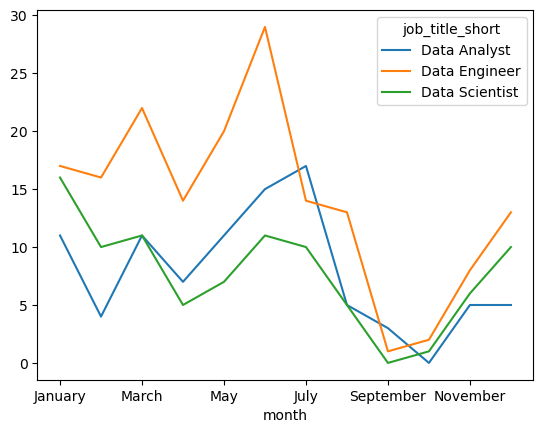

In [48]:
# plot a line graph using pandas
df_India_pivot_specific.plot(kind="line")
plt.show()

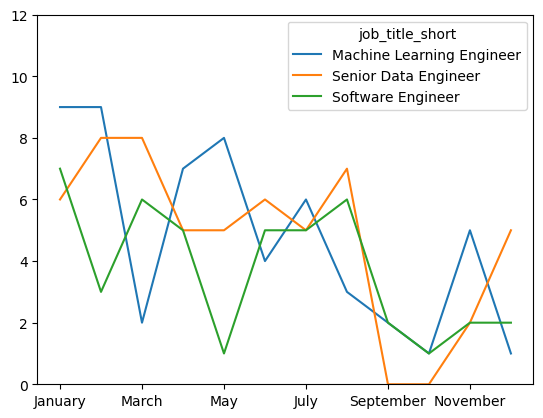

In [88]:
# Lets say instead of that specific jobs, we want top 3 jobs to be plotted in the same manner
# Funny that the randomly selected job profiles above are the top 3.. So lets say we need the next 3
df_India_next_three = pd.DataFrame(df_India["job_title_short"].value_counts())
df_India_next_three.reset_index()
next_three_roles = df_India_next_three.iloc[3:6].index.to_list()
next_three_roles

df_India_pivot_next_three = df_India_pivot[next_three_roles].copy()
df_India_pivot_next_three.fillna(0, inplace=True)
df_India_pivot_next_three.plot(kind="line").set_ylim(0, 12)
plt.xlabel("")
plt.show()